In [298]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


# Import the Geoapify API key
from api_key import geoapify_key

In [300]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"

# Read the data 
disaster_metadata = pd.read_csv(disaster_path)


# Display the data table for preview
disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [302]:
#Display the columns of the dataset to drop columns we weren't work with
disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [304]:
#Drop columns we don't need
clean_disaster_metadata = disaster_metadata.drop(columns=['Glide', 'Seq', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'ISO', 'Start Day','End Day', 'Local Time', 'River Basin', 'No Injured', 'No Affected', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', """Reconstruction Costs ('000 US$)""",
       '''Insured Damages ('000 US$)''', 'Latitude', 'Longitude', 'Location', 'No Homeless'])
clean_disaster_metadata.head()


,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN


In [306]:
clean_disaster_metadata.columns

Index(['Dis No', 'Year', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Country', 'Region', 'Continent', 'Start Year',
       'Start Month', 'End Year', 'End Month', 'Total Deaths',
       'Total Affected', 'Total Damages ('000 US$)'],
      dtype='object')

In [308]:
#Total number of unique disaster
len(clean_disaster_metadata['Dis No'].unique())

14644

In [354]:
# Identify the top three most frequent disasters

# Group by Disaster Type, then calculate and sort the total count in descending order
disaster_counts = clean_disaster_metadata.groupby('Disaster Type').size().reset_index(name='total')
disaster_counts = disaster_counts.sort_values(by='total', ascending=False)
disaster_counts = pd.DataFrame(disaster_counts)
#export table to a csv file
disaster_counts.to_csv("output_data/disaster_counts.csv", index_label="disaster_counts")   

disaster_counts

,Disaster Type,total
5,Flood,5272
11,Storm,4005
3,Epidemic,1436
2,Earthquake,1137
9,Landslide,713
1,Drought,685
4,Extreme temperature,584
13,Wildfire,452
12,Volcanic activity,222
8,Insect infestation,93


In [418]:
# Determine the top three most frequent disasters
top_disasters = cleaned_df['Disaster Type'].value_counts().head(3).index.tolist()
top_disasters 

['Flood', 'Storm', 'Epidemic']

In [422]:
top_three_data = clean_disaster_metadata[clean_disaster_metadata['Disaster Type'].isin(top_disasters)]
top_three_data

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,1970,1.0,1970,1.0,36.0,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,1970,1.0,1970,1.0,13.0,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,1970,9.0,1970,9.0,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,1970,4.0,1970,4.0,17.0,110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14639,2021-0449-YEM,2021,Natural,Hydrological,Flood,Yemen,Western Asia,Asia,2021,7.0,2021,8.0,11.0,67980.0,NaN
14640,2021-0075-ZAF,2021,Natural,Hydrological,Flood,South Africa,Southern Africa,Africa,2021,2.0,2021,2.0,31.0,400.0,75000.0
14641,2021-0599-COD,2021,Natural,Biological,Epidemic,Congo (the Democratic Republic of the),Middle Africa,Africa,2021,9.0,2021,9.0,131.0,301.0,NaN
14642,2021-0020-SRB,2021,Natural,Hydrological,Flood,Serbia,Southern Europe,Europe,2021,1.0,2021,1.0,NaN,22.0,NaN


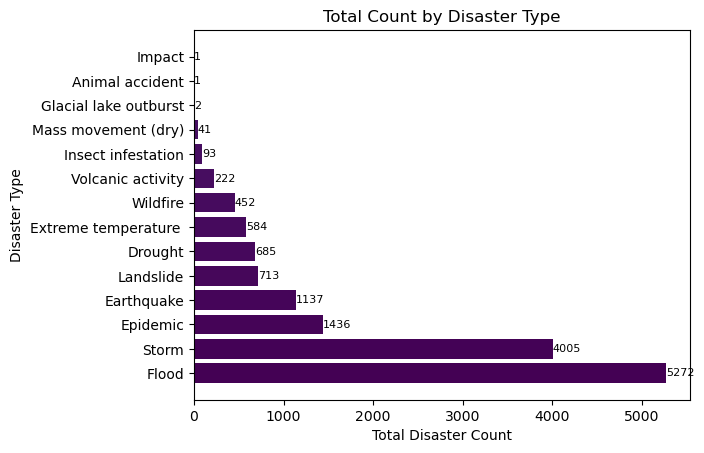

In [436]:
# Plotting using matplotlib with different colors for each Disaster Type
plt.barh(df['Disaster Type'], df['total'], color=plt.colormaps.get_cmap('viridis')(range(len(df))))
plt.xlabel('Total Disaster Count')
plt.ylabel('Disaster Type')
plt.title('Total Count by Disaster Type')

# Add text annotations for each bar
for index, value in enumerate(df['total']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show figure
plt.show()

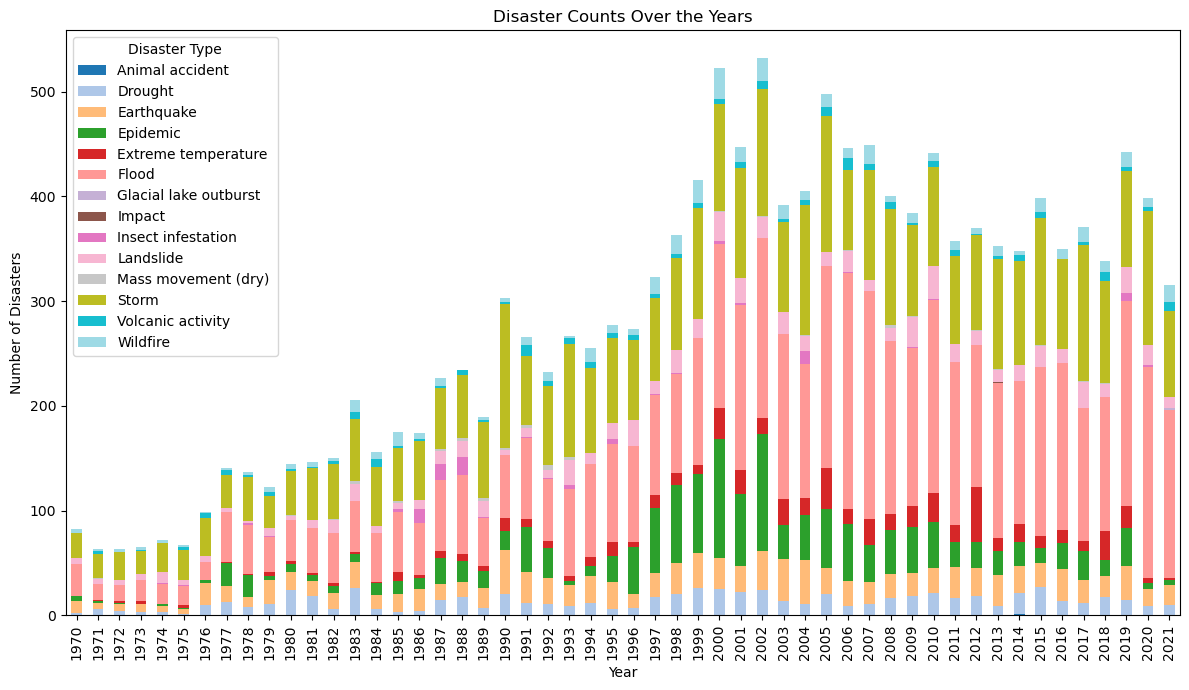

In [438]:
#plot a cluster bar chart over the years against count of disater with different colors in each column
#which disaster was most frequent
disaster_counts = clean_disaster_metadata.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Create a stacked bar chart
disaster_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

# Add labels and title
ax.set_title('Disaster Counts Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
ax.legend(title='Disaster Type')
ax.set_xticklabels(disaster_counts.index, rotation=90)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.tight_layout()
plt.show()

In [462]:
# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

#Export to csv file
disasters_per_year_continent.to_csv("output_data/continent_disasters.csv", index_label="continent_disasters")    

disasters_per_year_continent

Continent,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
1970,7,29,37,7,2
1971,7,24,24,4,4
1972,3,13,31,8,8
1973,7,25,22,7,4
1974,6,22,36,4,4
1975,10,18,27,4,8
1976,11,17,43,15,13
1977,22,28,68,11,12
1978,21,21,76,7,12


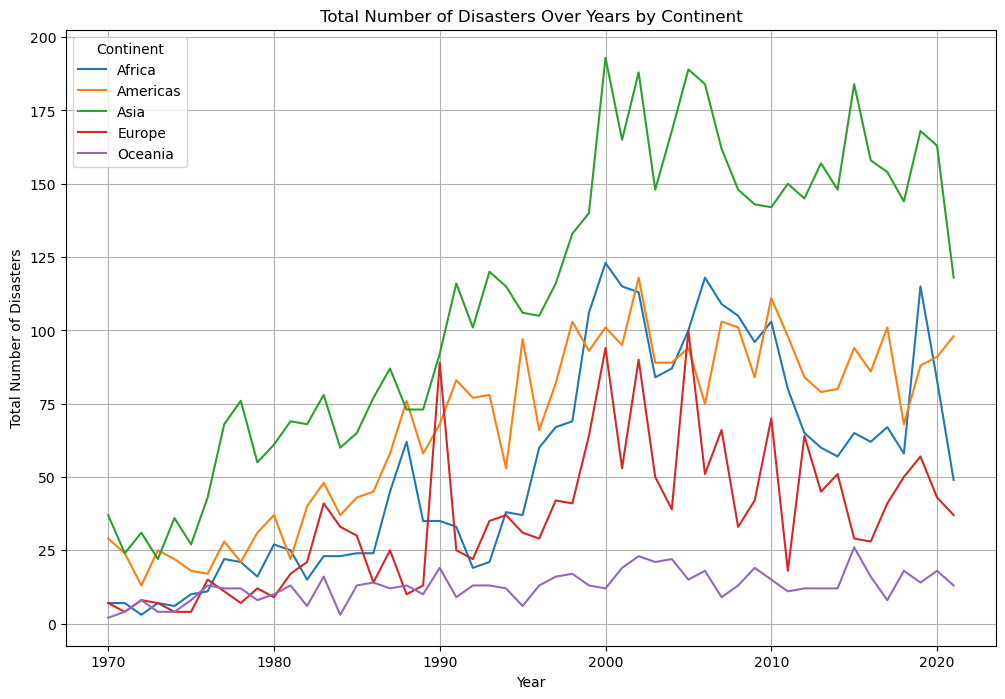

In [444]:
#plot line chart for total number of disasters over years against continents

# Group by Year and Continent to get the total number of disasters
disasters_per_year_continent = clean_disaster_metadata.groupby(['Year', 'Continent']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(12, 8))

for continent in disasters_per_year_continent.columns:
    plt.plot(disasters_per_year_continent.index, disasters_per_year_continent[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Number of Disasters')
plt.title('Total Number of Disasters Over Years by Continent')
plt.legend(title='Continent')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
plt.show()

In [458]:
# Frequency Distribution
frequency_distribution = clean_disaster_metadata['Continent'].value_counts()
frequency_distribution

Continent
Asia        5793
Americas    3519
Africa      2812
Europe      1858
Oceania      662
Name: count, dtype: int64

In [446]:
# Trend Analysis
trend_analysis = disasters_per_year_continent.describe()
trend_analysis

Continent,Africa,Americas,Asia,Europe,Oceania
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,54.076923,67.673077,111.403846,35.730769,12.730769
std,36.713435,30.216682,50.410184,24.532584,5.183365
min,3.000000,13.000000,22.000000,4.000000,2.000000
25%,22.750000,39.250000,68.750000,14.750000,9.750000
50%,53.000000,77.500000,116.000000,33.000000,13.000000
75%,83.250000,93.250000,151.000000,50.000000,16.000000
max,123.000000,118.000000,193.000000,100.000000,26.000000


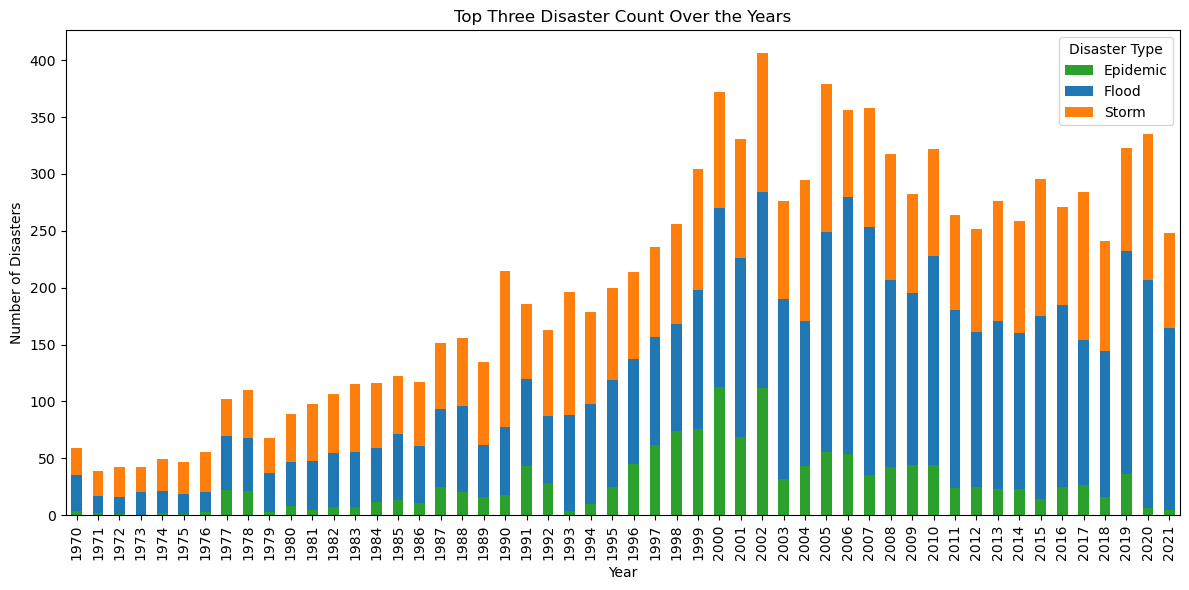

In [448]:
year_disaster_counts = top_three_data.groupby(['Year', 'Disaster Type']).size().unstack().fillna(0)

# List of custom colors
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']  # You can specify any colors you prefer

# Plot clustered bar chart with custom colors
ax = year_disaster_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Top Three Disaster Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.tight_layout()
plt.show()

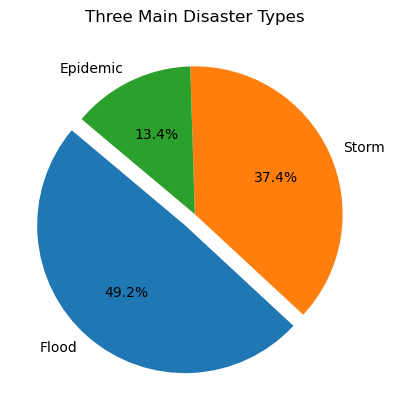

In [450]:
disaster_type = clean_disaster_metadata['Disaster Type'].value_counts()

# Creating a DataFrame for the top 3 disaster types
disaster_type_df = pd.DataFrame(disaster_type).head(3)
disaster_type_df.columns = ['Count']
table = disaster_type_df.reset_index()
table
plt.pie(
    table['Count'],  # Access the 'Count' column for pie values
    labels=table['Disaster Type'],  # Access the 'index' column for labels
    autopct="%1.1f%%",  # Format for displaying percentages
    shadow=False,  # Add shadow for styling
    startangle=140,  # Start angle for the first pie slice
    explode = [0.1, 0, 0]  #Separate the most frequent disaster
)
plt.title("Three Main Disaster Types")

# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()

In [514]:
#Unique countries observed in this dataset and their total number of disasters
#Number of times each country was affected by a disaster
disaster_countries = clean_disaster_metadata.groupby(['Country'])['Disaster Type'].count()

disaster_countries_df = pd.DataFrame(disaster_countries)
disaster_countries_df

,Disaster Type
Country,
Afghanistan,200
Albania,36
Algeria,77
American Samoa,5
Angola,74
...,...
Yemen Arab Rep,7
Yemen P Dem Rep,7
Yugoslavia,15


In [518]:
# Function to get latitude and longitude of a country
def get_country_lat_long(country, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses
        data = response.json()
        if data['features']:
            latitude = data['features'][0]['geometry']['coordinates'][1]
            longitude = data['features'][0]['geometry']['coordinates'][0]
            return latitude, longitude
        else:
            print(f"No results found for {country}. Response: {data}")
            return None, None
    except requests.RequestException as e:
        print(f"Error fetching data for {country}. Error: {e}")
        return None, None

# Ensure columns for latitude and longitude are initialized
if 'Lat' not in disaster_countries_df.columns:
    disaster_countries_df["Lat"] = None
if 'Lng' not in clean_disaster_metadata.columns:
    disaster_countries_df["Lng"] = None

# Get latitudes and longitudes for each country and update the disaster_countries_df DataFrame
for index, row in disaster_countries_df.iterrows():
    country = row['Country']
    lat, long = get_country_lat_long(country, geoapify_key)
    if lat is not None and long is not None:
        print(f"{country}: Latitude = {lat}, Longitude = {long}")
        disaster_countries_df.at[index, 'Lat'] = lat
        disaster_countries_df.at[index, 'Lng'] = long
    else:
        print(f"Could not get coordinates for {country}")
        
# Verify that no extra rows labeled 'Lat' and 'Lng' are present
if 'Lat' in disaster_countries_df.index:
    disaster_countries_df.drop('Lat', inplace=True)
if 'Lng' in disaster_countries_df.index:
    disaster_countries_df.drop('Lng', inplace=True)

disaster_countries_df.to_csv("output_data/country_coordinates.csv", index_label="country_coordinates")    

KeyError: 'Country'

In [ ]:
%%capture --no-display
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use lng/lat)
#show number of death based on size of circles in map


# Ensure the correct data types
disaster_metadata_df['Lat'] = pd.to_numeric(disaster_metadata_df['Lat'], errors='coerce')
disaster_metadata_df['Lng'] = pd.to_numeric(disaster_metadata_df['Lng'], errors='coerce')
disaster_metadata_df['Total Deaths'] = pd.to_numeric(disaster_metadata_df['Total Deaths'], errors='coerce')
disaster_metadata_df['Country'] = disaster_metadata_df['Country'].astype(str)
disaster_metadata_df['Disaster Type'] = disaster_metadata_df['Disaster Type'].astype(str)

# Drop rows with NaN values in Lat, Lng, or Total Deaths
disaster_metadata_df.dropna(subset=['Lat', 'Lng', 'Total Deaths'], inplace=True)

# Ensure there are no mixed types in any columns
print(disaster_metadata_df.dtypes)

# Configure the map plot
map_plot = disaster_metadata_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True,
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    size='Total Deaths',
    scale=0.1,
    color='Country',
    hover_cols=['Disaster Type']
)

# Display the map
map_plot

In [424]:
# Assuming `top_three_season_counts` and `top_disasters` are defined as in your original code

# Define month names for labeling
month_names = pd.to_datetime([f'2024-{i:02d}-01' for i in range(1, 13)]).strftime('%B')
month_names

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

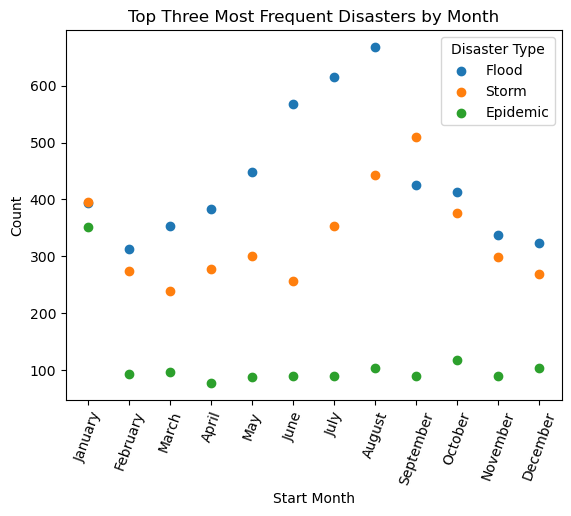

In [454]:
# Assuming `top_three_season_counts` and `top_disasters` are defined as in your original code

# Define month names for labeling
month_names = pd.date_range(start='2024-01-01', periods=12, freq='ME').strftime('%B')

# Create a dictionary mapping month numbers to month names
month_mapping = {i+1: name for i, name in enumerate(month_names)}

# Scatter Plot
for disaster in top_disasters:
    plt.scatter(top_three_season_counts.index, top_three_season_counts[disaster], label=disaster)

plt.title('Top Three Most Frequent Disasters by Month')
plt.xlabel('Start Month')
plt.ylabel('Count')

# Set month names as x-ticks with vertical rotation
plt.xticks(ticks=top_three_season_counts.index, labels=[month_mapping.get(i, '') for i in top_three_season_counts.index], rotation=70)

plt.legend(title='Disaster Type')

# Save the figure
plt.savefig("output_data/Fig6.png")
plt.show()

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_86297/201499165.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)


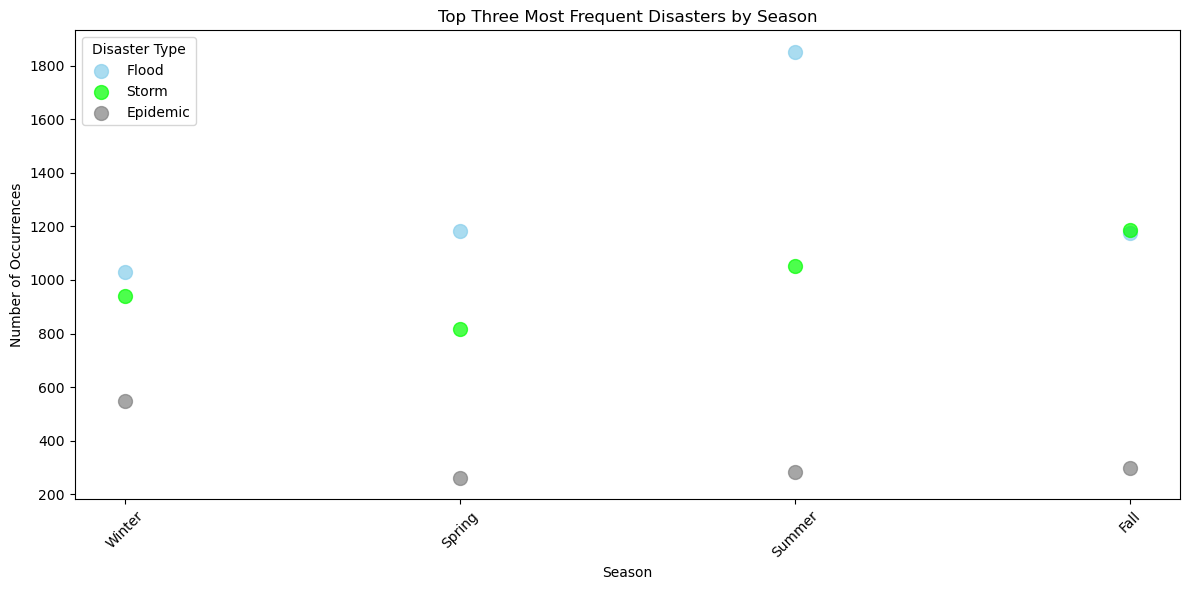

In [456]:
# Sample DataFrame (replace this with your actual DataFrame)
# disaster_metadata = pd.DataFrame({
#     'Disaster Type': ['Flood', 'Earthquake', 'Flood', 'Fire', 'Earthquake', 'Storm', 'Flood', 'Flood', 'Storm', 'Fire'],
#     'Start Month': [5, 7, 6, 12, 11, 8, 4, 3, 9, 2]
# })

# Select relevant columns
selected_columns = ['Disaster Type', 'Start Month']
filtered_df = clean_disaster_metadata[selected_columns]

# Drop rows with NaN values in the 'Start Month' column
cleaned_df = filtered_df.dropna(subset=['Start Month'])

# Determine the top three most frequent disasters
top_disasters = cleaned_df['Disaster Type'].value_counts().head(3).index.tolist()

# Filter the DataFrame for only the top three disaster types
filtered_top_disasters_df = cleaned_df[cleaned_df['Disaster Type'].isin(top_disasters)]

# Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)

# Prepare for plotting
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
colors = {'Flood': 'skyblue', 'Earthquake': 'coral', 'Storm': 'lime'}

# Plotting the scatter chart
plt.figure(figsize=(12, 6))

# Iterate over each disaster type and plot in one chart
for disaster in top_disasters:
    subset = filtered_top_disasters_df[filtered_top_disasters_df['Disaster Type'] == disaster]
    season_counts = subset['Season'].value_counts().reindex(seasons, fill_value=0)
    
    # Scatter plot for each disaster type in the same plot
    plt.scatter(season_counts.index, season_counts.values, 
                color=colors.get(disaster, 'gray'), s=100, label=disaster, alpha=0.7)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Number of Occurrences')
plt.title('Top Three Most Frequent Disasters by Season')
plt.xticks(seasons, rotation=45)
plt.tight_layout()
plt.legend(title='Disaster Type', loc='upper left')

# Save the figure
plt.savefig("output_data/Fig7.png")
plt.show()

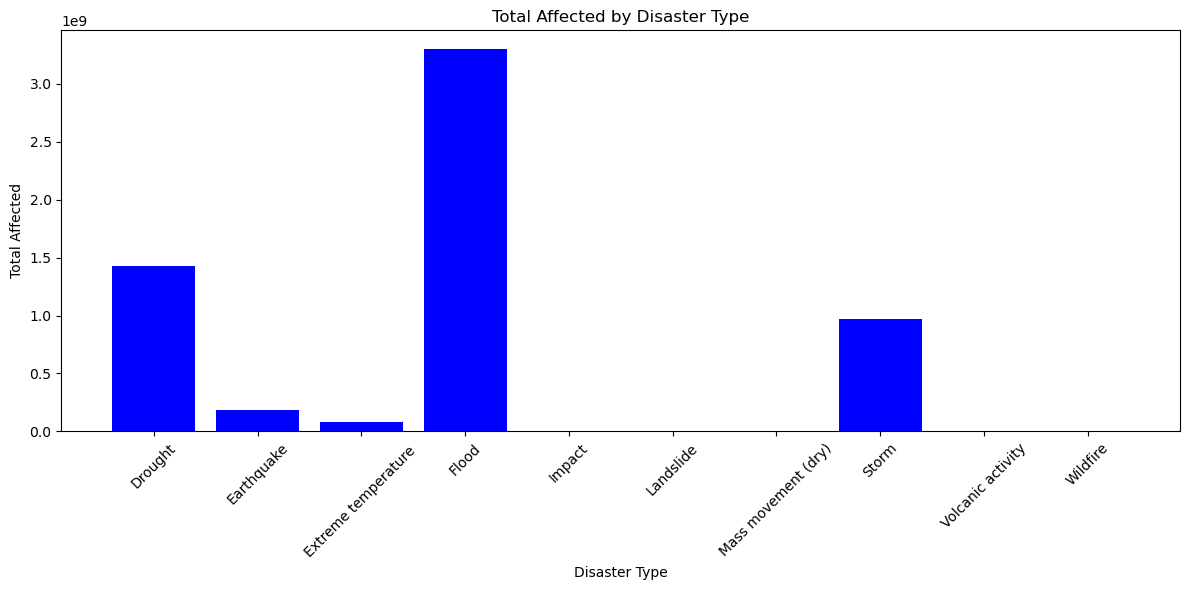

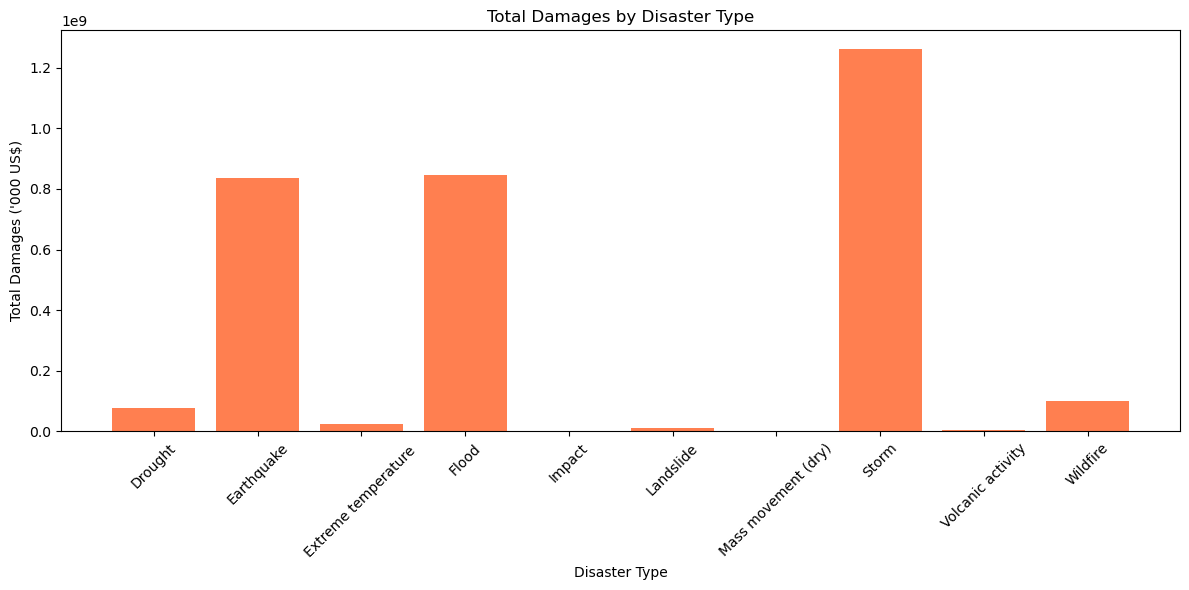

In [464]:
#which disaaster was most destructive (based on number of total effective and Total Damages )
selected_columns = ['Disaster Type', 'Total Affected', "Total Damages ('000 US$)"]

# Filter the DataFrame to keep only the selected columns
filtered_df = clean_disaster_metadata[selected_columns]

# Drop rows with NaN values in the selected columns
cleaned_df = filtered_df.dropna(subset=['Total Affected', "Total Damages ('000 US$)"])
cleaned_df
disaster_impact = cleaned_df.groupby('Disaster Type').agg({
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()

# Plotting Total Affected
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact['Total Affected'], color='blue')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.title('Total Affected by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output_data/Fig8.png")
plt.show()

# Plotting Total Damages
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact["Total Damages ('000 US$)"], color='coral')
plt.xlabel('Disaster Type')
plt.ylabel('Total Damages (\'000 US$)')
plt.title('Total Damages by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("output_data/Fig9.png")
plt.show()